 # End to end Project on Predicting heart disease using machine learning

### Importing libraries

In [1]:
2+2

4

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

Last updated: Sat Sep  7 09:49:11 2024


#### Import data

In [7]:
df = pd.read_csv('heart-disease.csv')

In [28]:
df2 = pd.read_csv('data/train.csv', low_memory=False)

In [8]:
pwd

'C:\\Users\\Name\\Desktop\\Machine'

### Explanatory data analysis

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [35]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [36]:
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='target'>

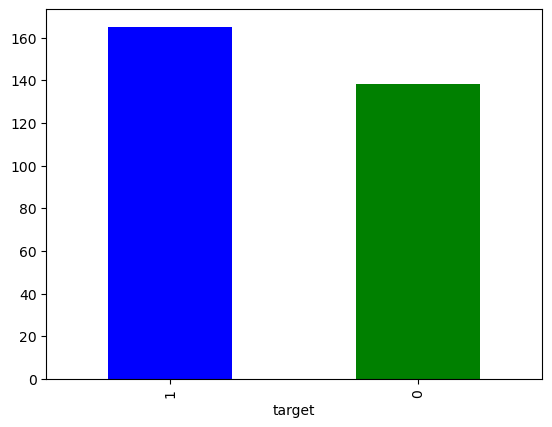

In [41]:
df['target'].value_counts().plot(kind = 'bar', color = ["blue", "green"])

In [42]:
3+4

7

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [45]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [46]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

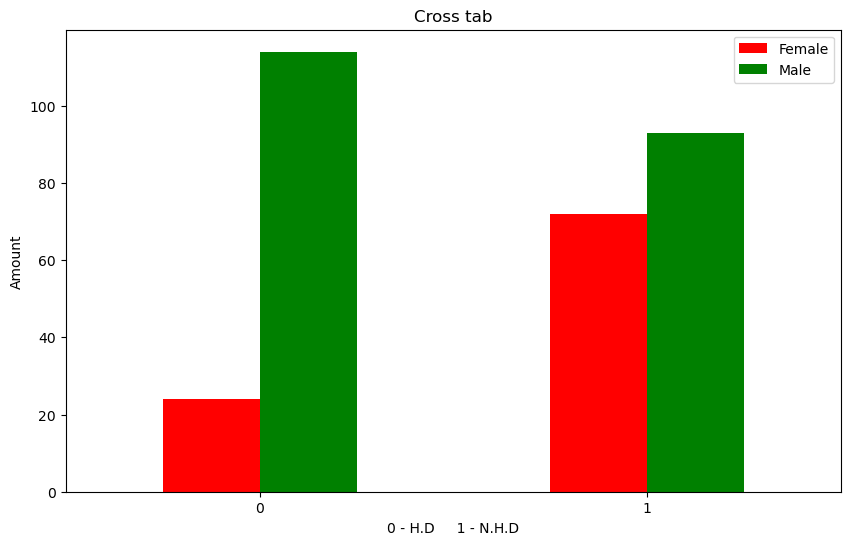

In [66]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,6), color = ["red", "green"])
plt.title('Cross tab')
plt.xlabel('0 - H.D     1 - N.H.D')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0)

Text(0.5, 0, 'Age')

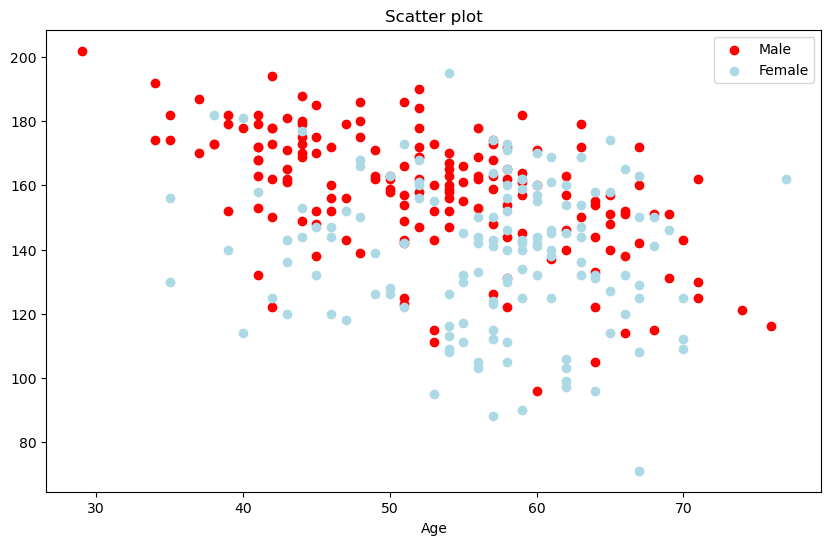

In [87]:
plt.figure(figsize = (10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c = 'red')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c = 'lightblue')
plt.title('Scatter plot')
plt.legend(['Male', 'Female'])
plt.xlabel('Age')

<Axes: ylabel='Frequency'>

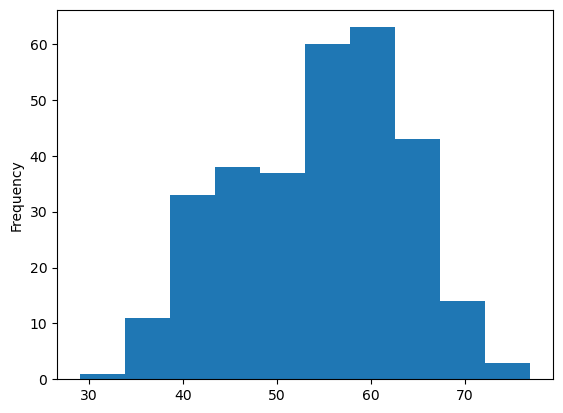

In [88]:
df.age.plot(kind = 'hist')

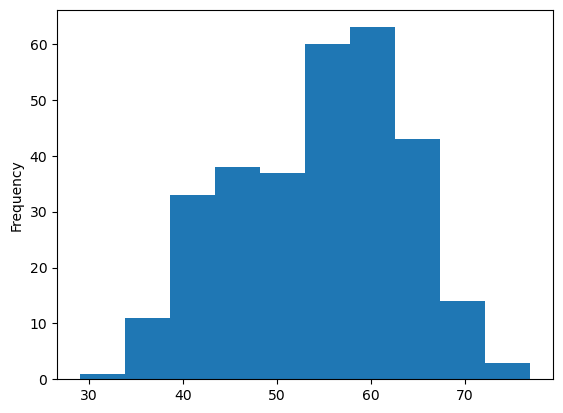

In [90]:
df.age.plot.hist();

In [94]:
mat = df.corr()
mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


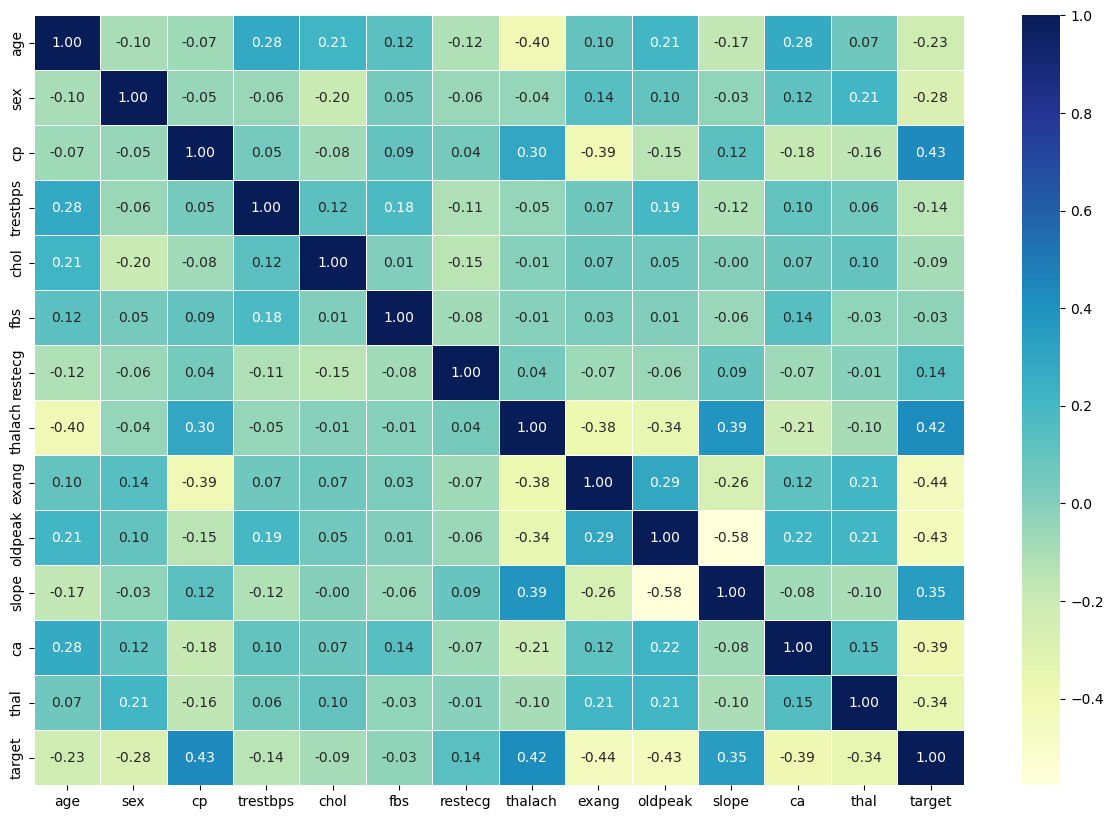

In [109]:
plt.figure(figsize = (15,10))
sns.heatmap(mat,annot = True, linewidths=0.5, fmt= ".2f", cmap="YlGnBu");


## Section 5 Modeling



In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
#split

x = df.drop('target', axis = 1)
y = df.target.values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [128]:
len(df)

303

In [129]:
0.2 * 303

60.6

In [69]:
len(x_test)

61

In [73]:
models = {'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier()}
# Function for models to fit

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
        


    

In [74]:
model_scores = fit_and_score(models = models, x_train =x_train, x_test = x_test, y_train = y_train, y_test = y_test)
model_scores

C:\Users\Name\Desktop\Machine\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.8688524590163934}

<Axes: >

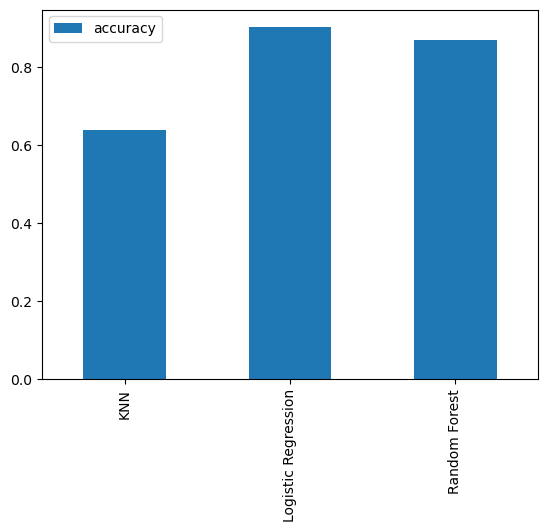

In [75]:
model_compare = pd.DataFrame(model_scores, index =['accuracy'])
model_compare.T.plot.bar()

### Hyperparameter tuning by hand

In [76]:
# Hyperparameter tuning by hand

train_scores = []
test_scores = []

knn = KNeighborsClassifier()
neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors = i )
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))
    
    

In [77]:
train_scores

[1.0,
 0.7975206611570248,
 0.7644628099173554,
 0.7396694214876033,
 0.743801652892562,
 0.7479338842975206,
 0.71900826446281,
 0.71900826446281,
 0.7272727272727273,
 0.7066115702479339,
 0.7066115702479339,
 0.6942148760330579,
 0.6900826446280992,
 0.6942148760330579,
 0.7024793388429752,
 0.6983471074380165,
 0.6900826446280992,
 0.6776859504132231,
 0.6694214876033058,
 0.6694214876033058]

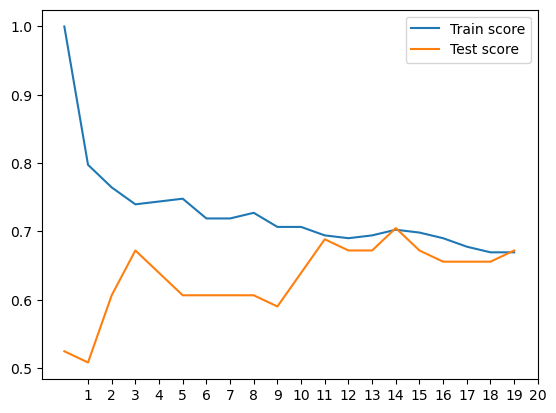

In [78]:
plt.plot(train_scores, label = 'Train score')
plt.plot(test_scores, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.legend()

maximum KNN score is: 70.49


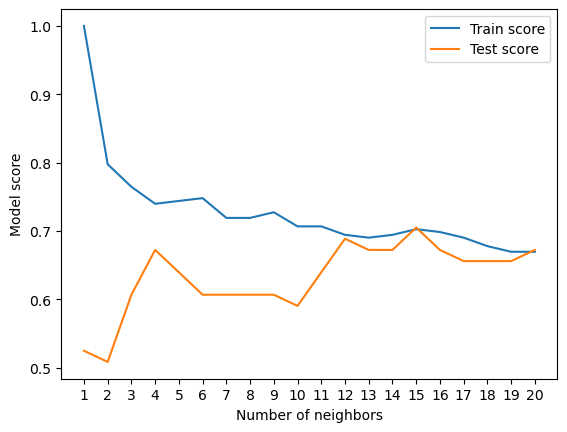

In [59]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
print(f'maximum KNN score is: {max(test_scores)*100:.2f}')

#### Tuning a model with RandomizedSearchCV

In [86]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4,4, 20),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [63]:
2

2

In [87]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_reg_grid,cv = 5, n_iter=20, verbose = True)
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [89]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [91]:
rs_log_reg.score(x_test, y_test)

0.9180327868852459

In [102]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv = 5, n_iter = 20, verbose = True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [101]:
rs_rf.score(x_test, y_test)

0.8524590163934426

In [100]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

#### Tuning a model with GridSearchCV

In [106]:
log_reg_grid = {"C":np.logspace(-4, 4, 20), "solver": ['liblinear']}

# Grid search hyperparameter for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, cv = 5, verbose = True)

In [108]:
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [109]:
gs_log_reg.score(x_test, y_test)

0.9180327868852459

In [110]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

#### Evaluating a classification model, beyond accuracy

In [113]:
y_preds = gs_log_reg.predict(x_test)

In [114]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

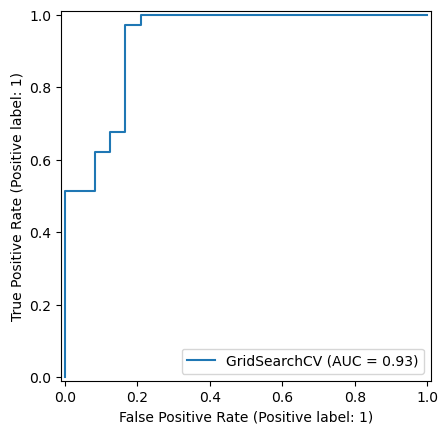

In [122]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator = gs_log_reg, X = x_test, y = y_test);

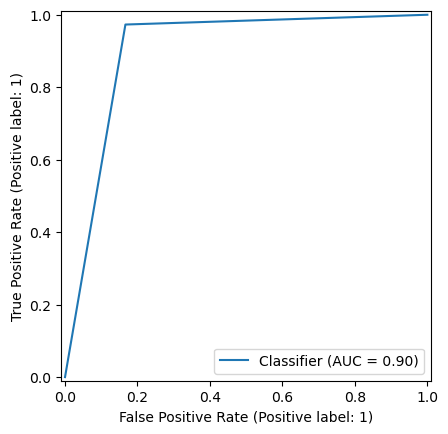

In [124]:
RocCurveDisplay.from_predictions(y_true = y_test, y_pred = y_preds);

#### Confusion matrix

In [126]:
print(confusion_matrix(y_test, y_preds))

[[20  4]
 [ 1 36]]


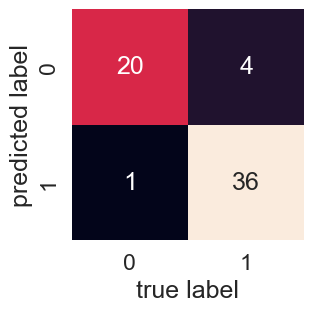

In [146]:
import seaborn as sns
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_pred):
    figg, aax = plt.subplots(figsize = (3,3))
    aax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cbar = False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

#### Classification Report

In [147]:

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.90      0.97      0.94        37

    accuracy                           0.92        61
   macro avg       0.93      0.90      0.91        61
weighted avg       0.92      0.92      0.92        61



Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use `cross_val_score()` along with various scoring parameter values.

In [148]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [150]:

from sklearn.model_selection import cross_val_score
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C = 0.23357214690901212, solver ='liblinear')


In [152]:
## Now we've got an instantiated classifier, let's find some cross-validated metrics.

cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [154]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [156]:
cv_precision = np.mean(cross_val_score( clf, x, y, scoring = 'precision'))
cv_precision

0.8215873015873015

In [158]:
cv_recall = np.mean(cross_val_score(clf, x, y, scoring = 'recall'))
cv_recall

0.9272727272727274

In [160]:
cv_f1 = np.mean(cross_val_score(clf, x,y, scoring = 'f1'))
cv_f1

0.8705403543192143

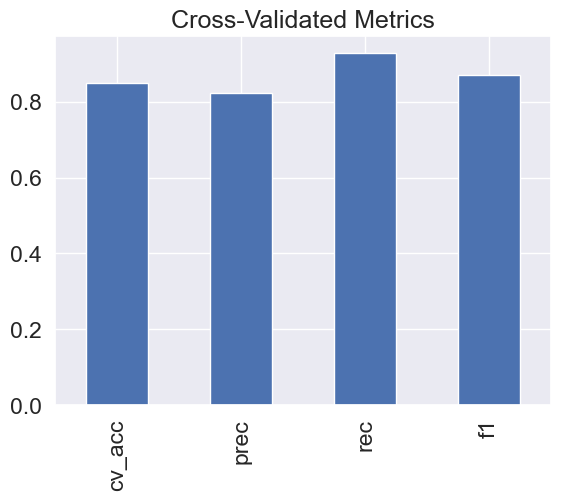

In [190]:
# Option 1 -- more better visualization

vis = pd.DataFrame({"cv_acc":cv_acc, "prec": cv_precision, "rec": cv_recall, "f1": cv_f1}, index = [0])
vis.T.plot.bar(title="Cross-Validated Metrics", legend = False);

 `vis.T`

.T transposes the DataFrame, swapping rows and columns. After transposition, the metrics (accuracy, precision, recall, F1) become the row labels, and their values are in a single column.

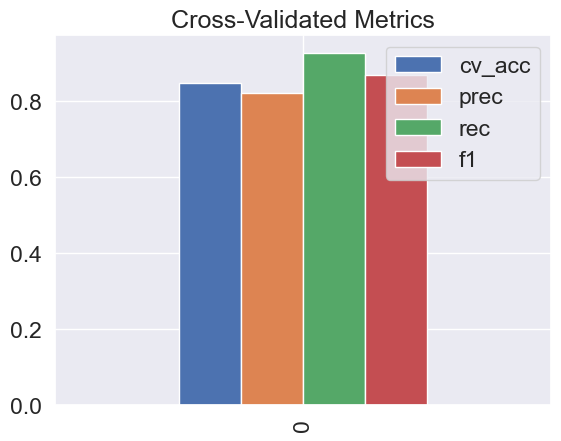

In [193]:
# Option 2 -- not better visualization since we have to transpose the metrics



vis = pd.DataFrame({"cv_acc":cv_acc, "prec": cv_precision, "rec": cv_recall, "f1": cv_f1}, index = [0])
vis.plot.bar(title="Cross-Validated Metrics");

In [194]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Feature importance

In [196]:
clf.fit(x_train, y_train);

In [197]:
clf.coef_

array([[ 0.00808358, -0.76116883,  0.64627603, -0.01029905, -0.00347296,
         0.09864617,  0.23664102,  0.02736094, -0.49501454, -0.49643757,
         0.24536463, -0.69944771, -0.75604972]])

In [204]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.00808358303517722,
 'sex': -0.7611688329718214,
 'cp': 0.6462760256951972,
 'trestbps': -0.010299049670432004,
 'chol': -0.003472956176148007,
 'fbs': 0.0986461658233783,
 'restecg': 0.23664101762159076,
 'thalach': 0.02736093929672964,
 'exang': -0.4950145395756107,
 'oldpeak': -0.4964375666928942,
 'slope': 0.24536462705442327,
 'ca': -0.6994477147849131,
 'thal': -0.7560497230835542}

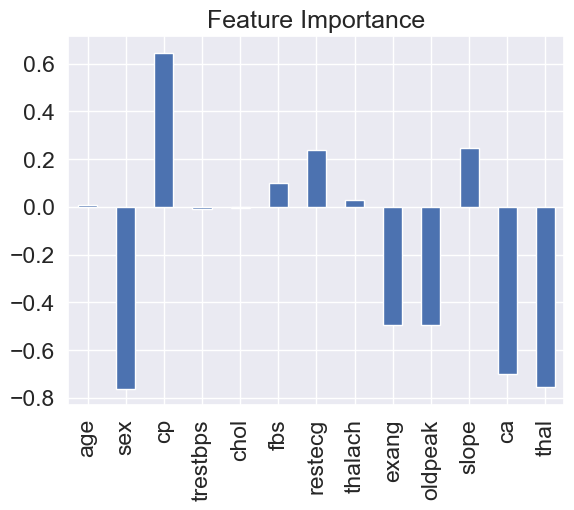

In [215]:
features_df = pd.DataFrame(features_dict,index = [0])
features_df.T.plot.bar(title="Feature Importance", legend = False);

In [216]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93
